In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']

# 载入数据

In [2]:
lj_data = pd.read_csv('./data/LJdata.csv')
lj_data.shape
lj_data.head()

(2760, 13)

,区域,地址,标题,户型,面积,价格,楼层,建造时间,朝向,更新时间,看房人数,备注,链接地址
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50平米,5800,中楼层(共6层),1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79平米,7800,中楼层(共28层),2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86平米,8000,低楼层(共25层),2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103平米,5300,低楼层(共13层),2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63平米,6400,高楼层(共16层),1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html


In [3]:
lj_data.columns
# 用英文的column name
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数',
       '备注', '链接地址'],
      dtype='object')

# 查看数据信息

In [4]:
lj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 13 columns):
district       2760 non-null object
address        2760 non-null object
title          2760 non-null object
house_type     2760 non-null object
area           2760 non-null object
price          2760 non-null int64
floor          2760 non-null object
build_time     2758 non-null object
direction      2760 non-null object
update_time    2760 non-null object
view_num       2760 non-null int64
extra_info     2760 non-null object
link           2760 non-null object
dtypes: int64(2), object(11)
memory usage: 280.4+ KB


In [5]:
# 查看统计信息
lj_data.describe(include='all')

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
count,2760,2760,2760,2760,2760,2760.000000,2760,2758,2760,2760,2760.000000,2760,2760
unique,208,1473,2369,24,203,NaN,105,138,35,14,NaN,1343,2381
top,望京租房,远洋山水,禾乔丽致公寓 诚意出租 看房随时 有钥匙,2室1厅,57平米,NaN,高楼层(共6层),2004年建塔楼,南 北,2017.07.26,NaN,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101833584.html
freq,109,19,4,1284,63,NaN,323,78,1009,634,NaN,469,3
mean,NaN,NaN,NaN,NaN,NaN,7570.800725,NaN,NaN,NaN,NaN,13.448913,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6316.204986,NaN,NaN,NaN,NaN,12.746202,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1300.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4500.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6000.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8500.000000,NaN,NaN,NaN,NaN,19.000000,NaN,NaN


# 找到最近更新信息的20套房子

In [6]:
lj_data.sort_values(by='update_time').tail(20)

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link
467,万柳租房,康桥水郡,昆玉河畔观景大宅 复式4居20平露台有车位 明厨明卫,4室1厅,199平米,25000,高楼层(共16层),2004年建板楼,东 西,2017.07.27,7,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101744630.html
2358,新华大街租房,怡佳家园,怡佳家园 5室2厅 15000元,5室2厅,240平米,15000,高楼层(共28层),2002年建塔楼,东 南 北,2017.07.27,6,距离八通线通州北苑站1062米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101704899.html
2356,亚运村租房,安慧里四区,安慧里简装朝东南一居室，家具家电齐全，可拎包入住,1室1厅,43平米,4500,高楼层(共6层),1989年建板楼,东南,2017.07.27,19,距离5号线惠新西街北口站441米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101174347.html
475,金宝街租房,禾风相府,禾风相府 舒适三居 拎包入住 交通便利,3室1厅,163平米,32000,高楼层(共14层),2004年建板塔结合,南 北,2017.07.27,13,距离5号线东四站619米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101767933.html
2334,苏州桥租房,中湾国际,中湾国际 1室0厅 6500元,1室0厅,37平米,6500,中楼层(共19层),2007年建塔楼,北,2017.07.27,2,距离10号线苏州街站791米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101849862.html
2335,玉泉营租房,鸿业兴园一区,鸿业兴园 正规两居室 家电家具全齐,2室1厅,91平米,5500,中楼层(共16层),2006年建板塔结合,南,2017.07.27,4,随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101831875.html
1153,滨河西区租房,双峪路小区,双峪路小区有一精装修两室一厅出租,2室1厅,48平米,3100,中楼层(共5层),1981年建板楼,南,2017.07.27,12,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101790165.html
1829,北七家租房,西湖新村,水系社区 带花园的2居室 北边无遮挡采光充裕 居住舒适,2室2厅,94平米,3400,低楼层(共7层),2000年建板楼,南 北,2017.07.27,12,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101630022.html
1158,通州北苑租房,长城国际,长城国际 精装一居 电梯房 拎包入住,1室1厅,53平米,3300,中楼层(共22层),2010年建塔楼,东,2017.07.27,18,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101791183.html
487,陶然亭租房,四平园,四平园 1室1厅 4600,1室1厅,53平米,4600,中楼层(共6层),1996年建板楼,东,2017.07.27,14,距离4号线陶然亭站719米 随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779348.html


# 平均看房人数

In [7]:
lj_data['view_num'].mean()

lj_data['view_num'].median()

13.44891304347826

10.0

# 房龄最小的20套房子的平均看房人数、平均面积

In [8]:
# 获取房龄
def get_age(x):
    try:
        return 2019-int(x[:4])
    except:
        return np.NaN

lj_data.loc[:,'age'] = lj_data['build_time'].apply(get_age)

# 获取房子面积
lj_data.loc[:,'house_area'] = lj_data['area'].apply(lambda x:int(x[:-2]))


lj_data[['view_num','age','house_area']].head()

# 获取n个最小值 （nlargest）
lj_data.nsmallest(columns='age', n=20)[['view_num', 'house_area']].mean()

,view_num,age,house_area
0,26,38.0,50
1,33,14.0,79
2,34,13.0,86
3,30,15.0,103
4,30,37.0,63


view_num       11.55
house_area    104.05
dtype: float64

# 房子价格的分布(平均，方差，中位数)

In [9]:
lj_data['price'].describe()

count      2760.000000
mean       7570.800725
std        6316.204986
min        1300.000000
25%        4500.000000
50%        6000.000000
75%        8500.000000
max      210000.000000
Name: price, dtype: float64

# 最受欢迎的朝向(平均看房人数)

In [10]:
temp = lj_data.groupby('direction')[['direction','view_num']].mean()
temp.reset_index().sort_values(by='view_num', ascending=False).head(1)

,direction,view_num
1,东 东北,34.0


# 最受欢迎的房型

In [11]:
tmp = lj_data.loc[:,['house_type','view_num']].groupby('house_type').agg('mean')
tmp.reset_index().sort_values(by='view_num', ascending=False).head(1)

,house_type,view_num
23,6室3厅,21.0


# 最受关注的小区

In [12]:
tmp = lj_data.loc[:,['address','view_num']].groupby('address').agg('sum')
tmp.reset_index().sort_values(by='view_num', ascending=False).head(1)

,address,view_num
951,清芷园,246


#  房型数量分布

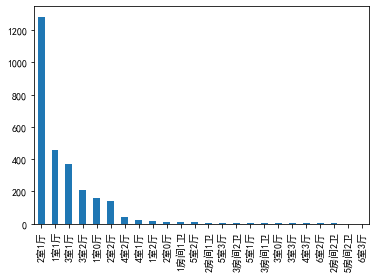

In [13]:
lj_data['house_type'].value_counts().plot(kind='bar') # dropna = False 表示保留 nan，默认情况下 dropna 是true，即默认情况下不包含 nan

In [14]:
lj_data.house_type.value_counts() / len(lj_data)

2室1厅     0.465217
1室1厅     0.165580
3室1厅     0.134420
3室2厅     0.075000
1室0厅     0.056884
2室2厅     0.051449
4室2厅     0.015217
4室1厅     0.007609
1室2厅     0.006159
2室0厅     0.003261
1房间1卫    0.002899
5室2厅     0.002899
2房间1卫    0.002174
5室3厅     0.001812
3房间2卫    0.001449
5室1厅     0.001449
3房间1卫    0.001087
3室0厅     0.001087
3室3厅     0.001087
4室3厅     0.001087
6室2厅     0.000725
2房间2卫    0.000725
5房间2卫    0.000362
6室3厅     0.000362
Name: house_type, dtype: float64

# 房子的平均租房价格(按平米算)

In [15]:
lj_data['price_per_m2'] = lj_data['price'] / lj_data['house_area']
lj_data.price_per_m2.mean()

87.72268429900429

# 出租房源最多的小区

In [16]:
lj_data['address'].value_counts().head(1)

远洋山水    19
Name: address, dtype: int64

# 集中供暖和非集中供暖的有多少家，平均价格是多少

In [17]:
lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x:'集中供暖' in x)
lj_data.center_heating.value_counts()

True     2284
False     476
Name: center_heating, dtype: int64

In [18]:
lj_data.loc[:,['price','center_heating']].groupby('center_heating').agg('mean')

,price
center_heating,
False,7317.436975
True,7623.603327


# 不同房型的平均/最大/最小面积

In [19]:
lj_data.loc[:,['house_area','house_type']].groupby('house_type').agg(['mean','max','min'])

house_area          
                  mean  max  min
house_type                      
1室0厅         48.484076  140   19
1室1厅         54.669584  107   28
1室2厅         72.411765  109   45
1房间1卫        42.875000   48   35
2室0厅         49.888889   55   42
2室1厅         78.725857  194   26
2室2厅        106.028169  228   60
2房间1卫        60.166667   67   52
2房间2卫        37.000000   38   36
3室0厅         67.000000   70   61
3室1厅        114.237197  217   54
3室2厅        145.690821  255   79
3室3厅        144.000000  181  123
3房间1卫        85.333333   91   77
3房间2卫        46.750000   63   39
4室1厅        165.285714  330   87
4室2厅        196.333333  304  119
4室3厅        179.000000  237  150
5室1厅        138.250000  180   99
5室2厅        242.125000  332  181
5室3厅        191.600000  219  135
5房间2卫       158.000000  158  158
6室2厅        274.000000  316  232
6室3厅        720.000000  720  720

#  哪个地铁口附近的房子最多

In [20]:
import re

def get_subway_info(string, pattern, n):
    result = re.search(pattern, string)
    if result:
        return result.group(n)
    return ''

pattern = '距离(.+线(\(.*?段\))?)(.+站)'
lj_data.loc[:,'subway_station'] = lj_data['extra_info'].apply(lambda x:get_subway_info(x, pattern, 3))

lj_data['subway_station'].value_counts()

           1086
达官营站         43
双井站          34
安华桥站         32
青年路站         30
十里堡站         28
阜通站          28
北苑路北站        25
望京站          24
立水桥南站        22
东湖渠站         21
苏州街站         20
广渠门外站        19
广渠门内站        19
朝阳公园站        19
东直门站         19
太阳宫站         17
劲松站          17
安立路站         17
三元桥站         17
梨园站          16
大望路站         16
和平里北街站       16
惠新西街北口站      15
潘家园站         15
芍药居站         15
车公庄西站        15
昌平站          15
西直门站         14
刘家窑站         14
           ... 
后沙峪站          2
马连洼站          2
回龙观东大街站       2
奥林匹克公园站       2
木樨地站          1
珠市口站          1
复兴门站          1
肖村站           1
灯市口站          1
天通苑南站         1
南楼梓庄站         1
丰台科技园站        1
广阳城站          1
北京站站          1
国家图书馆站        1
郭公庄站          1
育知路站          1
西北旺站          1
国贸站           1
大钟寺站          1
东单站           1
呼家楼站          1
虎坊桥站          1
张自忠路站         1
农大南路站         1
北海北站          1
南邵站           1
高碑店站          1
欢乐谷景区站        1
枣营站           1
Name: subway_station, Le

# 地铁附近的房子平均价格 比 非地铁的高多少

In [21]:
lj_data.loc[:,'near_subway'] = lj_data['subway_station'].apply(lambda x:len(x)>2)

lj_data[['price','near_subway']].groupby('near_subway').agg('mean')

,price
near_subway,
False,6106.436464
True,8520.800478


# 地铁附近的房源离地铁平均距离

In [22]:
pattern = '(\d+)米'
lj_data.loc[:,'subway_distance'] = lj_data['extra_info'].apply(lambda x: get_subway_info(x, pattern, 1))

lj_data.loc[lj_data.near_subway==True,'subway_distance'].astype(int).mean()

717.5501792114695

# 最多的在租楼层

In [23]:
lj_data['floor'].apply(lambda x:x[:3]).value_counts()

中楼层    1026
高楼层     932
低楼层     798
地下室       4
Name: floor, dtype: int64

# 直接看房的房子比例

In [24]:
lj_data.loc[:,'convenient'] = lj_data['extra_info'].apply(lambda x:'随时看房' in x)

lj_data['convenient'].value_counts(normalize=True)

True     0.998551
False    0.001449
Name: convenient, dtype: float64